<a href="https://colab.research.google.com/github/kdh7979/Korean-SignLanguage-Interpreter/blob/main/mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 36.1MB 109kB/s 


In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
img_fg = cv2.imread(r"/content/Korean-SignLanguage-Interpreter/pictures/n_mask.png")   #마스크    (1411, 1920, 3)
img_fg = img_fg[250:1400, 0:1920]
img2gray = cv2.cvtColor(img_fg, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

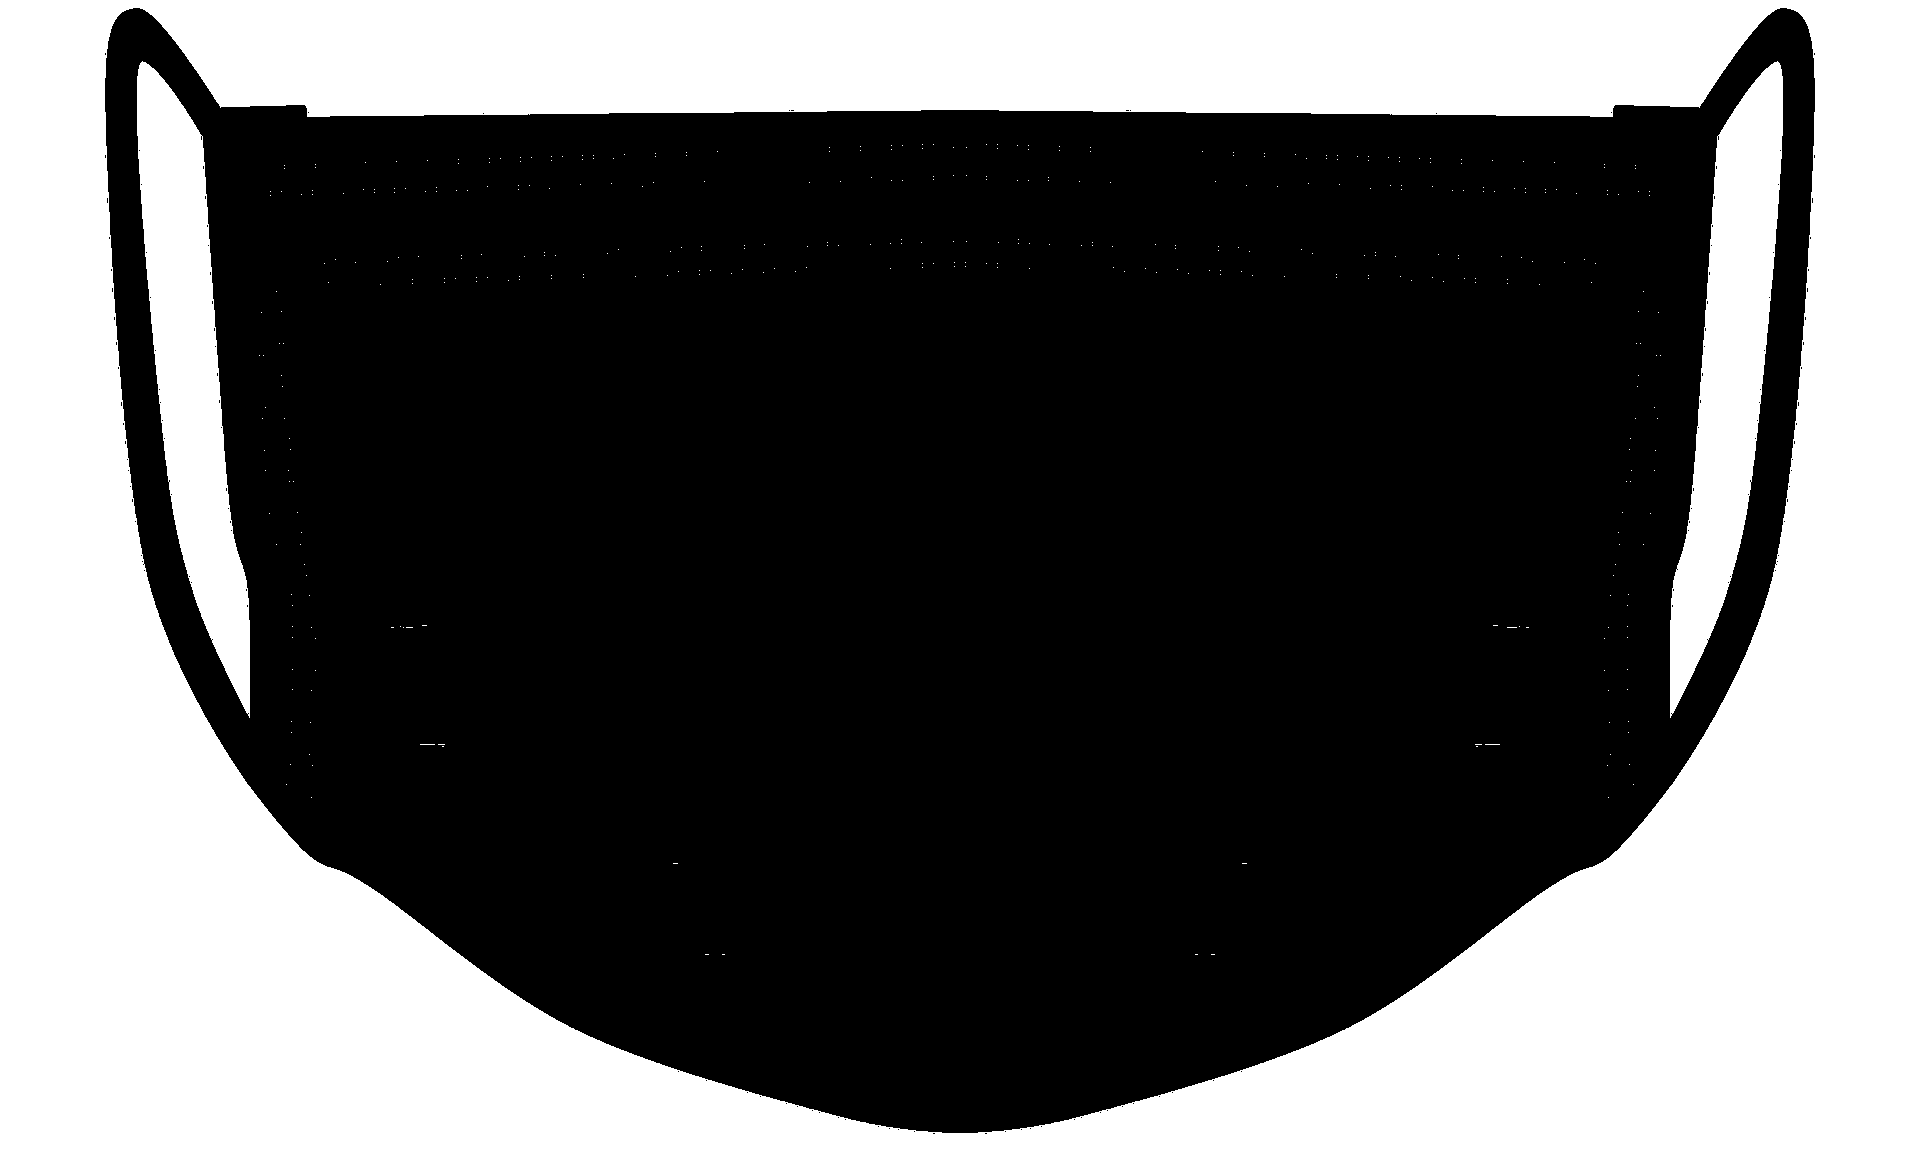

In [ ]:
cv2_imshow(mask_inv)

In [ ]:
# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
for i in range(1, 2):
    cap = cv2.VideoCapture(r"/content/Korean-SignLanguage-Interpreter/pictures/KETI_SL_0000000001.avi")
    with mp_face_mesh.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as face_mesh:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty camera frame.")
                # If loading a video, use 'break' instead of 'continue'.
                cv2.destroyAllWindows()
                break
            # the BGR image to RGB.
            image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
            # To improve performance, optionally mark the image as not writeable to
            # pass by reference.
            image.flags.writeable = False
            results = face_mesh.process(image)
            # Draw the face mesh annotations on the image.
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            if results.multi_face_landmarks:
                for face_landmarks in results.multi_face_landmarks:
                    mp_drawing.draw_landmarks(
                        image=image,
                        landmark_list=face_landmarks,
                        connections=mp_face_mesh.FACE_CONNECTIONS,
                        landmark_drawing_spec=drawing_spec,
                        connection_drawing_spec=drawing_spec)
                    #4개 랜드마크의 픽셀 좌표 지정
                    top = int(results.multi_face_landmarks[0].landmark[10].y*720)
                    bottom = int(results.multi_face_landmarks[0].landmark[152].y*720)
                    left = int(results.multi_face_landmarks[0].landmark[234].x*1280) - 30
                    right = int(results.multi_face_landmarks[0].landmark[454].x*1280) + 30

                    #마스크 이미지의 크기 정하기
                    h_fg = int((bottom - top)/2)+20
                    w_fg = right - left
                    #레이어 마스크 크기 조정
                    mask = cv2.resize(mask, (w_fg, h_fg))
                    mask_inv = cv2.resize(mask_inv, (w_fg, h_fg))
                    #마스크 크기 조정
                    img_fg = cv2.resize(img_fg, (w_fg, h_fg))
                    #ROI 추출
                    roi = image[bottom-h_fg:bottom, left:right]
                    #마스크 이미지와 image 합성한 후 roi에 저장
                    roi = cv2.bitwise_and(roi, roi, mask = mask_inv)
                    img_fg = cv2.bitwise_and(img_fg, img_fg, mask = mask)
                    dst = cv2.add(roi, img_fg)
                    
                    #roi와 image 합치기
                    image[bottom-h_fg:bottom, left:right] = dst
                    #결과 영상 저장
                    #fps = cap.get(cv2.CAP_PROP_FPS)
                    #fourcc = cv2.VideoWriter_fourcc(*'DIVH')
                    #out = cv2.VideoWriter('output_1.avi', fourcc, 30, (1280, 720))
            cv2_imshow(image)
            if cv2.waitKey(1) & 0xFF == 27:
                cv2.destroyAllWindows()
                break
        cap.release()

In [ ]:
!git clone https://github.com/kdh7979/Korean-SignLanguage-Interpreter.git

Cloning into 'Korean-SignLanguage-Interpreter'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 58 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.
